

![](https://europe-west1-atp-views-tracker.cloudfunctions.net/working-analytics?notebook=tutorials--agent-evaluation-intellagent--intellagent-evaluation-tutorial)


# Evaluating LLM Agents with IntellAgent: A Complete Tutorial

## Overview

This notebook will guide you through building and evaluating an AI agent using a powerful multi-agent evaluation framework.

## What is IntellAgent?

[IntellAgent](https://intellagent-doc.plurai.ai/) is an innovative multi-agent framework that automatically evaluates AI agents in simulated environments. Consider it a comprehensive and advanced testing suite capable of generating realistic scenarios, simulating user interactions, and delivering in-depth analyses of your agent's performance.

## The Challenge: Why Agent Evaluation is Hard

Evaluating LLM agents presents two major challenges:
1. **Dataset Construction**: Creating diverse, challenging, and realistic test scenarios that cover edge cases
2. **Reliable Metrics**: Defining evaluation criteria that accurately measure agent performance beyond simple accuracy

Traditional testing approaches often fall short because they rely on static datasets that don't capture the dynamic nature of real user interactions.

## IntellAgent's Three-Stage Approach
IntellAgent solves these challenges through a sophisticated three-stage process:
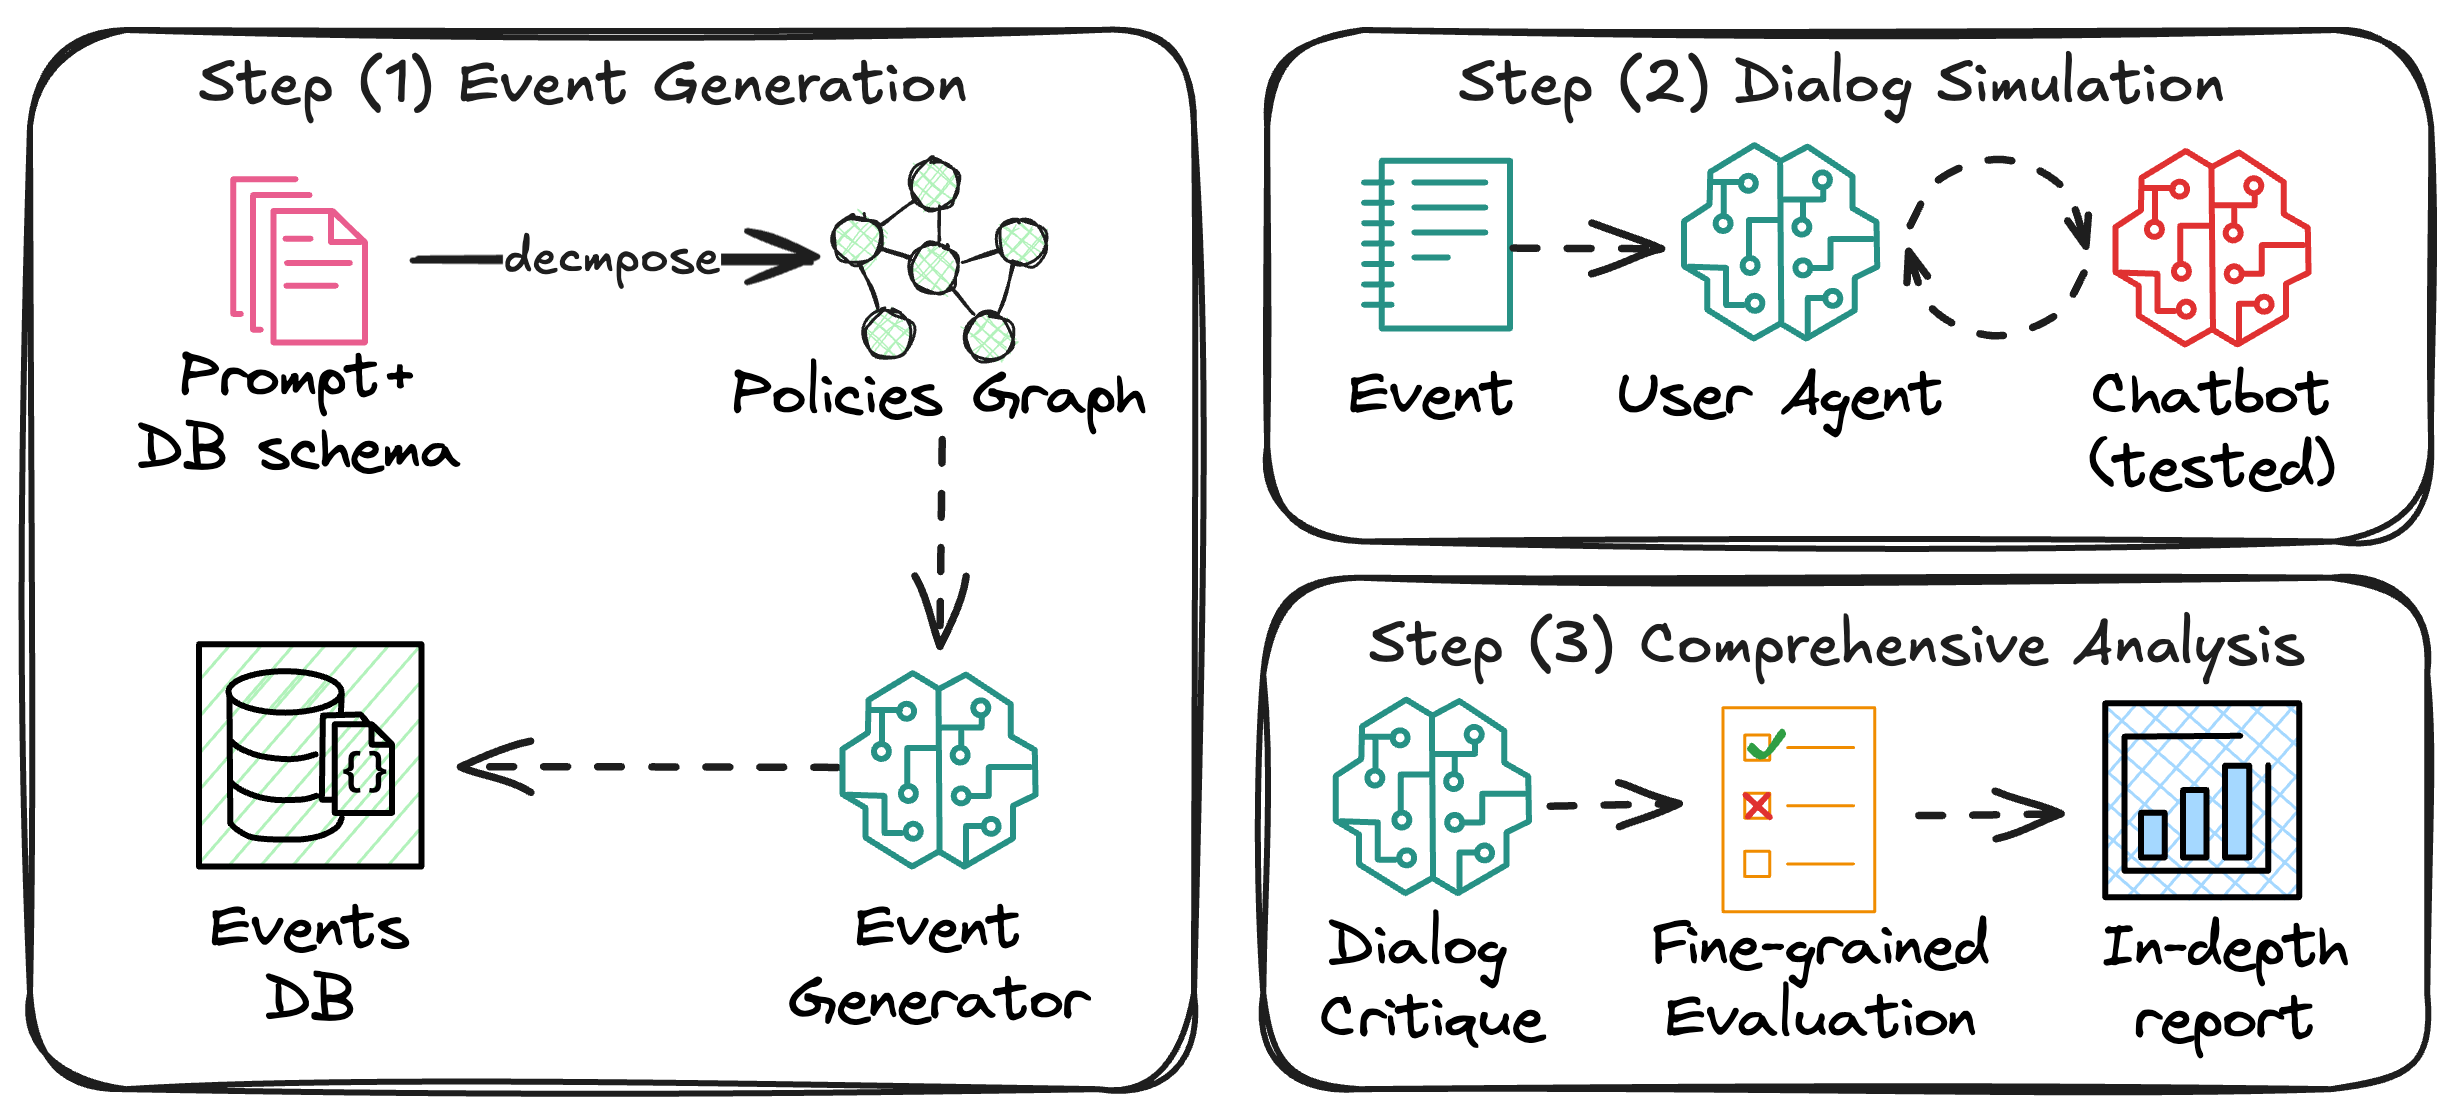

### 🎯 Stage 1: Intelligent Scenario Generation
- Automatically creates realistic, diverse test scenarios
- Generates edge cases that test specific rules and policies
- Ensures comprehensive coverage of potential user interactions

### 🤖 Stage 2: Dynamic Simulation
- Simulates realistic user-agent conversations
- Adapts interaction patterns based on agent responses
- Captures complex multi-turn dialogue dynamics

### 📊 Stage 3: Fine-Grained Analysis
- Provides detailed behavioral analysis
- Identifies policy violations and performance gaps
- Offers actionable insights for improvement

## Key Benefits

- **Automated Testing**: No manual test case creation required
- **Comprehensive Coverage**: Tests scenarios you might not think of
- **Realistic Evaluation**: Simulates actual user behavior patterns
- **Actionable Insights**: Clear feedback on what needs improvement
- **Scalable**: Works for simple chatbots to complex multi-tool agents

## What You'll Learn

In this tutorial, we'll build and evaluate a simple educational assistant agent. You'll learn how to:

1. Set up the IntellAgent framework
2. Configure simulation parameters
3. Run automated evaluations
4. Analyze results using built-in visualization tools

Let's dive in and see IntellAgent in action!


📖 **For more background on the IntellAgent multi-agent framework and evaluation, check out our detailed blog post:** [IntellAgent multi-agent framework](https://open.substack.com/pub/diamantai/p/intellagent-the-multi-agent-framework?r=336pe4&utm_campaign=post&utm_medium=web&showWelcomeOnShare=false)

*DiamantAI is a top 0.1% newsletter for AI with over 25,000 subscribers, focusing on AI techniques, breakthroughs, and tutorials.*

---


## Step 1: Clone the IntellAgent Repository

First, we need to get the IntellAgent framework set up in our environment. This involves cloning the repository and installing all necessary dependencies.

In [ ]:
# Clone the repository
!git clone https://github.com/plurai-ai/intellagent.git
# Change to the repo directory
%cd intellagent

In [ ]:
# Install the required dependencies
!pip install -r requirements.txt && pip install nest_asyncio

## Step 2: Configure LLM API Credentials

IntellAgent needs access to Large Language Models to generate scenarios, simulate users, and run your agent. The framework supports all major LLM providers including OpenAI, Anthropic, Azure, Google, Bedrock, and NVIDIA.

We'll create a configuration file that securely stores your API credentials. Make sure to replace the placeholder with your actual API key.

In [ ]:
import os
import yaml

# # Enter your OpenAI API key (the framework support all Langchain LLM providers)
OPENAI_API_KEY = "your-api-key-here"  # Replace with your actual API key

#Create the llm_env.yml configuration file
llm_config = {
    "openai": {
        "OPENAI_API_KEY": OPENAI_API_KEY
    }
}


# Make sure the config directory exists
os.makedirs("config", exist_ok=True)

# Write the configuration to the file
with open("config/llm_env.yml", "w") as f:
    yaml.dump(llm_config, f)

print("✅ LLM API credentials configured successfully.")
print("📝 Note: You can add multiple providers to this configuration file.")

## Step 3: Design Your Agent

Now comes the exciting part - defining what your agent should do! We're creating an educational assistant that helps students learn. The prompt below defines the agent's personality, capabilities, and most importantly, the policies it should follow.

**Why This Matters**: The prompt is crucial because IntellAgent will test whether your agent actually follows these guidelines. It will generate scenarios that try to make the agent violate its policies, helping you identify potential issues before deployment.

Notice how we've defined specific policies like "don't solve problems directly" and "use age-appropriate language" - IntellAgent will create test scenarios to verify these behaviors.

In [ ]:
# Create the necessary directories
os.makedirs("examples/my_education_agent/input", exist_ok=True)

# Define a simple educational chatbot prompt
education_prompt = """
# Educational Assistant Guidelines

You are an educational assistant designed to help students with their learning needs. Follow these guidelines:

## Core Responsibilities:
- Provide clear, accurate information on educational topics
- Explain complex concepts in simple terms
- Help with homework questions by guiding the student through the solution process
- Recommend learning resources when appropriate

## Policies:
1. **Do not solve problems directly** - Instead, provide guidance and hints
2. **Use age-appropriate language** - Adjust explanations based on the student's level
3. **Encourage critical thinking** - Ask follow-up questions that promote deeper understanding
4. **Be patient and supportive** - Create a positive learning environment
5. **Verify understanding** - Check if the student has understood the explanation

## Subject Areas:
- Mathematics (Basic arithmetic to advanced calculus)
- Science (Physics, Chemistry, Biology)
- Language Arts (Grammar, Writing, Literature)
- Social Studies (History, Geography, Civics)

Remember, your goal is to help students learn and grow, not just provide answers.
"""

# Write the prompt to a file
with open("examples/my_education_agent/input/wiki.md", "w") as f:
    f.write(education_prompt)

print("✅ Educational agent prompt created successfully.")
print("🎯 Agent will be tested on policies like 'no direct problem solving' and 'age-appropriate language'")

## Step 4: Configure the Simulation Parameters

Before running our evaluation, we need to tell IntellAgent how to conduct the test. This configuration file controls several important aspects:

- **Which models to use**: We can use different models for the IntellAgent system vs. your actual agent
- **How many test scenarios**: More scenarios = more comprehensive testing, but longer runtime

We're starting with conservative settings to keep the tutorial quick, but you can scale these up for production testing.

In [ ]:
# Define the configuration
config = {
    "environment": {
        "prompt_path": "examples/my_education_agent/input/wiki.md",  # Path to our agent's prompt
    },
    "llm_intellagent": {
        "type": "openai",  # Using OpenAI for the IntellAgent system
        "name": "gpt-4o"   # You can adjust this to another model if needed
    },
    "llm_chat": {
        "type": "openai",  # Using OpenAI for the chatbot agent
        "name": "gpt-4o-mini"   # You can adjust this to another model if needed
    },
    "dataset": {
        "num_samples": 10   # Number of test scenarios to generate (reduced for faster execution)
    }
}

# Write the configuration to a file
with open("config/my_education_config.yml", "w") as f:
    yaml.dump(config, f, default_flow_style=False)

print("✅ Configuration file created successfully.")
print(f"🔧 Will generate {config['dataset']['num_samples']} test scenarios")

## Step 5: Initialize the IntellAgent System

Now we're ready to start the evaluation process! This step initializes the IntellAgent framework with our configuration. The system will prepare to generate test scenarios based on your agent's prompt and policies.

**What's happening here**: IntellAgent analyzes your agent prompt to understand what policies and behaviors it should test. It then prepares to create diverse scenarios that will challenge these aspects of your agent.

In [ ]:
import nest_asyncio
import warnings
warnings.filterwarnings(
    "ignore",
    message="API key must be provided when using hosted LangSmith API"
)
nest_asyncio.apply()

### Loading the Simulation Environment

This cell loads our configuration and initializes the simulation environment. The `SimulatorExecutor` is the main engine that will coordinate the entire evaluation process.


In [ ]:
from simulator.utils.file_reading import override_config
from simulator.simulator_executor import SimulatorExecutor
import importlib
import simulator.utils.logger_config as logger_config
importlib.reload(logger_config)
base_output_path = './results/education'
config = override_config('config/my_education_config.yml') # Loading the config file
# loading the simulator executor with the environment
executor = SimulatorExecutor(config, base_output_path) 

print("✅ IntellAgent simulation environment initialized")
print(f"📁 Results will be saved to: {base_output_path}")

## Step 6: Generating the synthetic dataset
We generate a database of scenarios, and print the first scenario 


In [ ]:
# This will generate the dataset in case the dataset was not generated before
executor.load_dataset('data_1')

print("✅ Finish generating the scenario dataset")
print(f"🧐 An example of generated scenario: \n{executor.dataset_handler.records[0].description.event_description}")

## Step 7: Simulating the Interaction with the Agent

Next, we simulate the interaction and apply a critique to evaluate whether any policy was violated.

In [ ]:
# Run the complete simulation process
print("🚀 Starting simulation...")
print("📊 This will generate scenarios, simulate conversations, and analyze results")
print("⏱️  Estimated time: 2-5 minutes for 10 scenarios")
print("\n" + "="*50)

executor.run_simulation('exp_1')

print("\n" + "="*50)
print("✅ Simulation completed successfully!")
print("📈 Results are ready for analysis")

## Step 8: Analyze Your Results

Congratulations! Your agent has been thoroughly tested. Now it's time to see how it performed. IntellAgent provides a comprehensive visualization dashboard that lets you explore every aspect of the evaluation.

**What you'll see in the dashboard**:
- Individual conversation traces showing exact user-agent interactions
- Policy violation analysis highlighting where your agent didn't follow guidelines
- Performance metrics across different types of policies and scenarios
- Detailed critique explaining what went right and what needs improvement

The visualization will launch in your browser and provide an interactive interface to explore all results.

In [ ]:
# Launch the results visualization dashboard
import subprocess
import threading
import time
from IPython.display import IFrame

def run_streamlit():
    try:
        subprocess.run([
            "streamlit", "run", "simulator/visualization/Simulator_Visualizer.py"
        ], cwd=".")
    except Exception as e:
        print(f"Error running Streamlit: {e}")

# Start Streamlit in a separate thread
print("🚀 Starting IntellAgent Results Dashboard...")
print("📊 This will launch an interactive visualization of your agent's performance")
print("⏱️  Please wait a moment for the dashboard to load ")

streamlit_thread = threading.Thread(target=run_streamlit)
streamlit_thread.daemon = True  # Set as daemon so it exits when the notebook exits
streamlit_thread.start()

# Wait a few seconds for Streamlit to start
time.sleep(5)

# Display in an iframe (may not work in all environments)
try:
    display(IFrame(src="http://localhost:8501", width=1000, height=600))
    print("\n📈 Dashboard loaded successfully!")
    print("🔍 Navigate to the '🤖 Session Visualizer' page to explore conversation traces")
except:
    print("\n🌐 Dashboard is running at: http://localhost:8501")
    print("📝 Please open this URL in a new browser tab to view your results")
    print("🔍 Once there, navigate to the '🤖 Session Visualizer' page")

## Conclusion and Next Steps

🎉 **Congratulations!** You've successfully completed your first IntellAgent evaluation. You now have:

✅ A comprehensive understanding of how IntellAgent works  
✅ Hands-on experience with the complete evaluation pipeline  
✅ Detailed analysis of your agent's performance  
✅ Actionable insights for improvement  

### Next steps

To further enhance your evaluation process, you could:

- Experiment with different agent prompts or instructions
- Try different LLM models (e.g., GPT-4o, Claude, etc.)
- Test a more complex agent that interacts with databases and tools (see the [airline example](https://intellagent-doc.plurai.ai/examples/airline/))
- [Customize](https://intellagent-doc.plurai.ai/customization/custom_chatbot/) the framework for your specific use case


### Get Advanced Support

Need a state-of-the-art, customized evaluation framework that tests all agent components with real-world data and provides tailored critique refinement?

Our offerings include:
- **Complex Multi-Tool Agents**: Test agents that use databases, APIs, and external tools
- **RAG System Evaluation**: Assess retrieval-augmented generation performance
- **Custom Evaluation Metrics**: Define domain-specific success criteria
- **Real-World Data Integration**: Test with your actual user interaction patterns


---

**Resources**: [IntellAgent GitHub Repository](https://github.com/plurai-ai/intellagent) | [Contact Plurai](https://www.plurai.ai/contact-us)
